# Inicjalizacja

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.rcParams["figure.figsize"] = (10, 10)
mpl.rcParams["lines.linestyle"] = ""
mpl.rcParams["lines.marker"] = ","
mpl.rcParams["lines.markerfacecolor"] = "b"
mpl.rcParams["lines.markeredgecolor"] = "b"

# Generowanie zbiorów

In [2]:
def generatePointsRect(minX, maxX, minY, maxY, count):
    x = np.random.uniform(minX, maxX, count).astype("float64")
    y = np.random.uniform(minY, maxY, count).astype("float64")
    
    return x, y

def generatePointsCircle(radius, count):
    fi = np.random.uniform(0, 2 * np.pi, count).astype("float64")
    
    x = np.cos(fi) * radius
    y = np.sin(fi) * radius
    
    return x, y

def generatePointsLine(aX, aY, bX, bY, scale, count):
    middle = [(aX + bX) / 2, (aY + bY) / 2]
    
    # difference between middle and B
    diff = np.array([bX - middle[0], bY - middle[1]])
    
    # generate scalar
    move = np.random.uniform(-scale, scale, count).astype("float64")
    
    # our points is: middle + difference between middle and B multiplicated by scale (double-ended range)
    x = middle[0] + move * diff[0]
    y = middle[1] + move * diff[1]
    
    return x, y

def scaleAxes(limits, scale):
    plt.axis((np.array(limits) * scale).tolist())

# Zadania

## 2.a

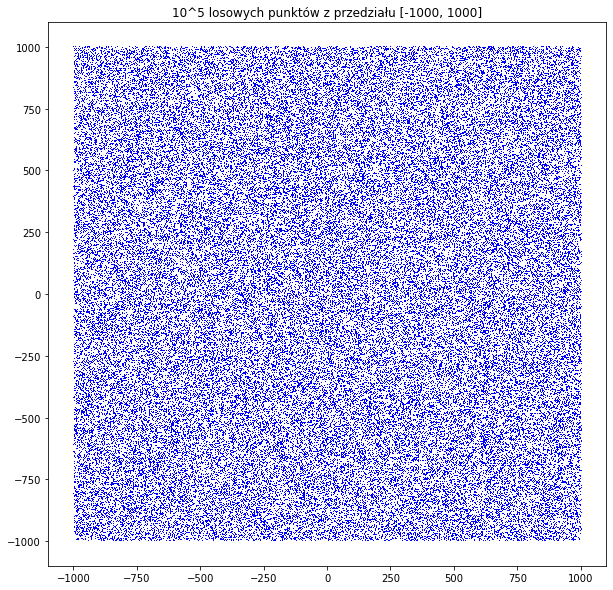

In [3]:
limits = [-1000, 1000, -1000, 1000]
x, y = generatePointsRect(*limits, 10 ** 5)

scaleAxes(limits, 1.1)
plt.title("10^5 losowych punktów z przedziału [-1000, 1000]")
plt.plot(x, y)

## 2.b

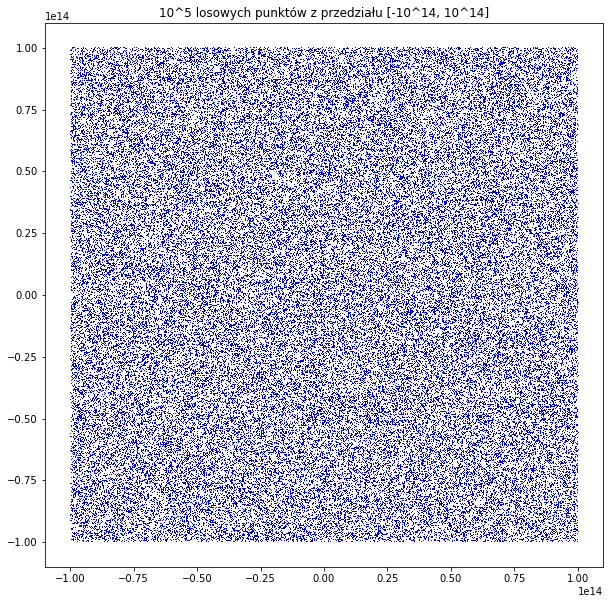

In [4]:
limits = [-10 ** 14, 10 ** 14, -10 ** 14, 10 ** 14]
x, y = generatePointsRect(*limits, 10 ** 5)

scaleAxes(limits, 1.1)
plt.title("10^5 losowych punktów z przedziału [-10^14, 10^14]")
plt.plot(x, y)

## 2.c

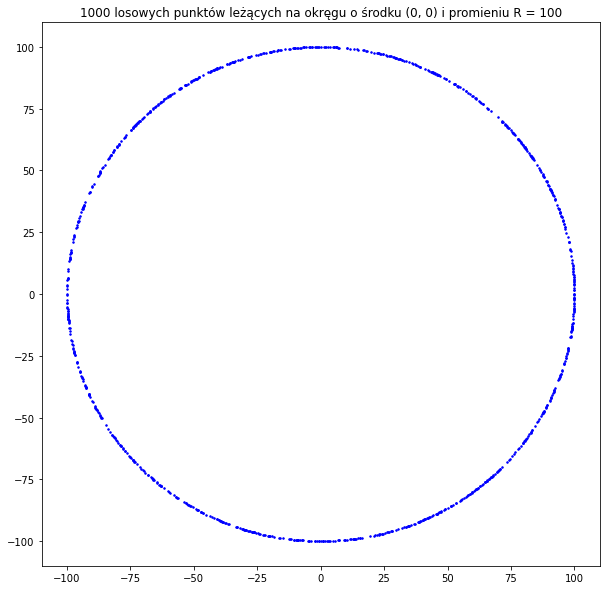

In [5]:
limits = [-100, 100, -100, 100]
x, y = generatePointsCircle(100, 1000)

scaleAxes(limits, 1.1)
plt.title("1000 losowych punktów leżących na okręgu o środku (0, 0) i promieniu R = 100")
plt.plot(x, y, '.', ms=3)

## 2.d

[-1.  0.] [1.  0.1]


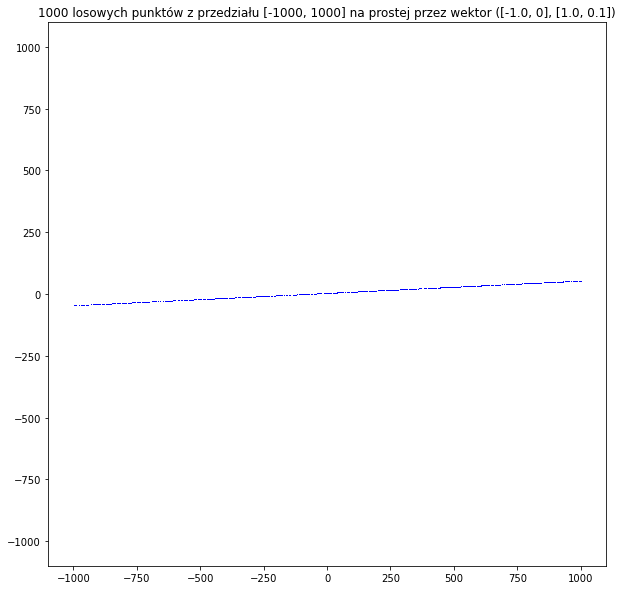

In [6]:
limits = [-1000, 1000, -1000, 1000]
a = np.array([-1.0, 0.0])
b = np.array([1.0, 0.1])

print(a, b)

x, y = generatePointsLine(*a, *b, 1000, 1000)

scaleAxes(limits, 1.1)
plt.title("1000 losowych punktów z przedziału [-1000, 1000] na prostej przez wektor ([-1.0, 0], [1.0, 0.1])")
plt.plot(x, y)

## 4

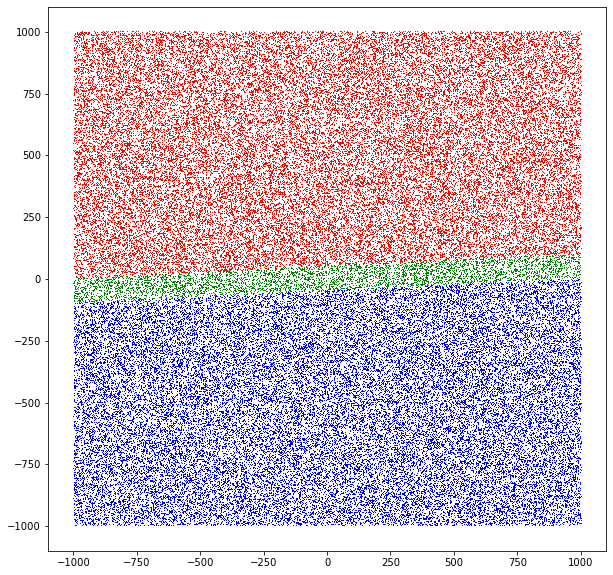

In [7]:
a = [-1.0, 0.0]
b = [1.0, 0.1]

def detNP2(a, b, c):
    m = np.array([
        [a[0] - c[0], a[1] - c[1]],
        [b[0] - c[0], b[1] - c[1]]
    ])
    
    return np.linalg.det(m)

def detNP3(a, b, c):
    m = np.array([
        [a[0], a[1], 1],
        [b[0], b[1], 1],
        [c[0], c[1], 1]
    ])
    
    return np.linalg.det(m)


def detOwn2(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (b[0] - c[0]) * (a[1] - c[1])

def splitPoints(x, y, a, b, detFn, epsilon):
    ccw = []
    cw = []
    coll = []
    
    for c in zip(x, y):
        det = detNP2(a, b, c)
        if det < -epsilon:
            cw.append(c)
        elif det <= epsilon:
            coll.append(c)
        else:
            ccw.append(c)
    
    ccwX, ccwY = zip(*ccw)
    cwX, cwY = zip(*cw)
    collX, collY = zip(*coll)
    
    return np.array(ccwX), np.array(ccwY), np.array(cwX), np.array(cwY), np.array(collX), np.array(collY)
        
limits = [-1000, 1000, -1000, 1000]
x, y = generatePointsRect(*limits, 10 ** 5)

ccwX, ccwY, cwX, cwY, collX, collY = splitPoints(x, y, a, b, detNP2, 100)

plt.close()
scaleAxes(limits, 1.1)
plt.plot(ccwX, ccwY, mfc='r')
plt.plot(collX, collY, mfc='g')
plt.plot(cwX, cwY, mfc='b')
plt.show()